In [8]:
from keras.datasets import mnist 
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

(x_train, y_train),(x_test,y_test) = mnist.load_data()
x = x_test

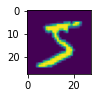

5


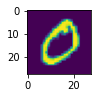

0


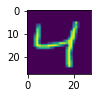

4


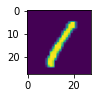

1


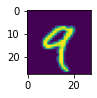

9


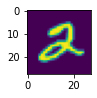

2


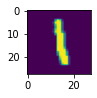

1


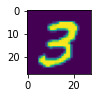

3


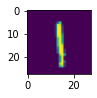

1


In [9]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
  plt.show()
  print(y_train[i])

In [10]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [12]:
from keras.models import Sequential
model = Sequential()

#model ANN
# input 
model.add(Dense(784, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
# 1
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
# 2
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
# output
model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(x_test,y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dropout_3 (Dropout)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [14]:
score = model.evaluate(x_test, y_test,verbose=1)
print('Test loss= ', score[0])
print('Test accuracy= ', score[1])


313/313 [==============================] - 1s 5ms/step - loss: 0.1853 - accuracy: 0.9843
Test loss=  0.18527771532535553
Test accuracy=  0.9843000173568726


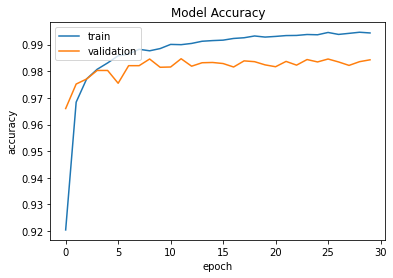

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

In [16]:
y_pred = model.predict(x_test)

# Tạo một index và dự đoán 
random_index = np.random.choice(len(x_test))
x_sample = x_test[random_index]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_index]
y_sample_classes = y_pred[random_index]

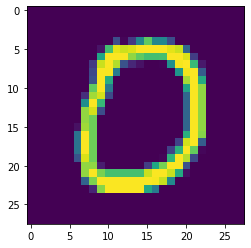

0


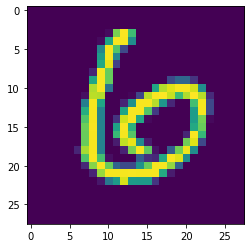

6


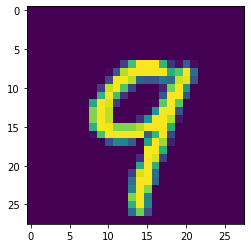

9


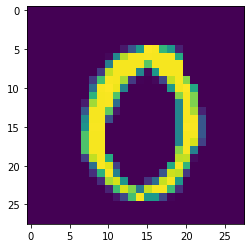

0


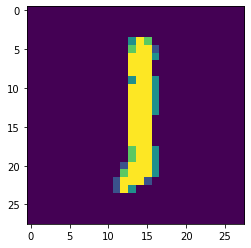

1


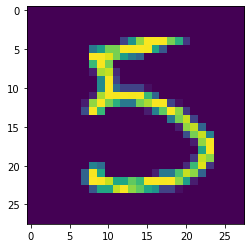

5


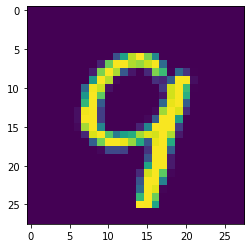

9


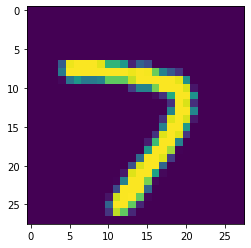

7


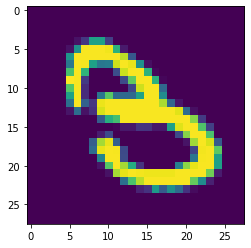

3


In [18]:
y_pred=model.predict(x_test)
for i in range(9):
  #plt.subplot(330+i+1) #330: 3 hang 3 cot, stt di tu trai sang phai tren duoi,i=0 thi 331 phan tu tuong tac la so 1
  plt.imshow(x[10+i])
  plt.show()
  #print(np.round(y_pred[i]))
  print(np.argmax(np.round(y_pred[10+i])))

In [19]:
model.save('mnist(ANN).h5')